# load data

ValueError: ignored

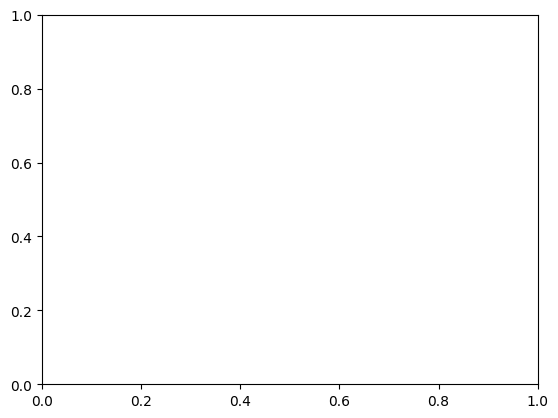

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the systems and their corresponding scores
systems = ['whisperv2', 'whisperv1', 'whispermedium', 'wordonline']
patients = ['1025', '6013', 'test']
wer_scores = [[0.0085, 0.1791, 0.0993],
              [0.0695, 0.2961, 0.2967],
              [0.0583, 0.3307, 0.3307],
              [0.2321, 0.4641, 0.5529]]
mer_scores = [[0.0085, 0.1782, 0.0986],
              [0.0692, 0.2852, 0.2852],
              [0.0576, 0.3205, 0.3205],
              [0.2237, 0.4887, 0.4647]]
wil_scores = [[0.0141, 0.2339, 0.1479],
              [0.1154, 0.4230, 0.4230],
              [0.0917, 0.4686, 0.4686],
              [0.3673, 0.6925, 0.6651]]

# Set the width of each bar
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(systems))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar chart
plt.bar(r1, wer_scores[0], color='r', width=bar_width, label='WER')
plt.bar(r2, mer_scores[0], color='g', width=bar_width, label='MER')
plt.bar(r3, wil_scores[0], color='b', width=bar_width, label='WIL')

# Add scatter plots for individual scores
for i, system in enumerate(systems):
    plt.scatter([r1[i]]*3, wer_scores[i], color='r', marker='o')
    plt.scatter([r2[i]]*3, mer_scores[i], color='g', marker='o')
    plt.scatter([r3[i]]*3, wil_scores[i], color='b', marker='o')

# Set the x-axis labels and title
plt.xlabel('Systems')
plt.ylabel('Scores')
plt.title('WER, MER, and WIL Scores for Different Systems')

# Set the x-axis tick labels
plt.xticks(r2, systems, rotation=90)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

In [ ]:
audio = pd.read_csv('/content/audio_pat.csv',delimiter=',')

movement = pd.read_csv('/content/movement_pat.csv',delimiter=',')

face = pd.read_csv('/content/face_pat.csv',delimiter=',')

text_va = pd.read_csv('/content/text_VA_pat.csv', delimiter=',')

text_emo = pd.read_csv('/content/text_emo_pat.csv', delimiter=',')

trento = pd.read_csv('/content/trentofeat_pat.csv', delimiter=',')

table_data = []

In [ ]:
import shutil

# Replace 'folder_path' with the path of the folder you want to zip
folder_path = '/content/plots_o'
shutil.make_archive('/content/plots_o', 'zip', folder_path)

from google.colab import files

# Replace 'zip_file_path' with the path to the zip archive you created
zip_file_path = '/content/plots_o.zip'
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# run pearson and spearman and save plots

In [ ]:
import pandas as pd
text_emo = pd.read_csv('/content/text_emo_o.csv', delimiter=',')
table_data = []

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


Correlation Results for Patient Scores and Dataframes:


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


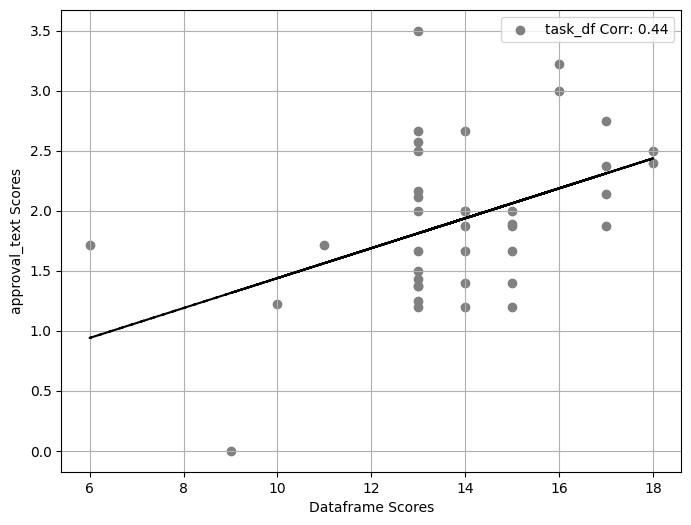

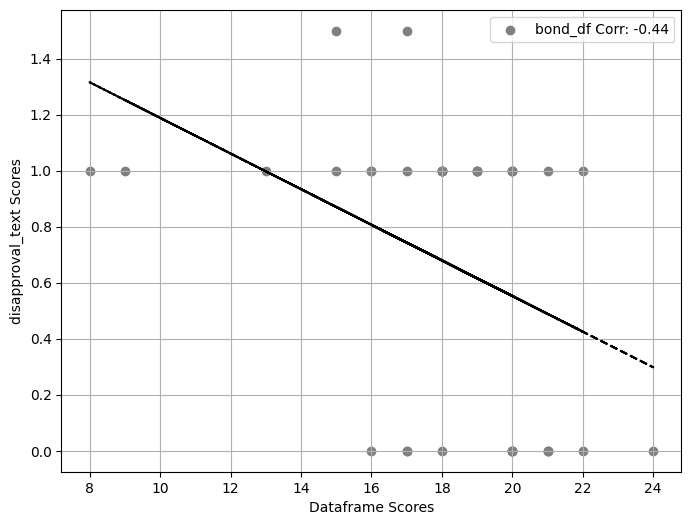

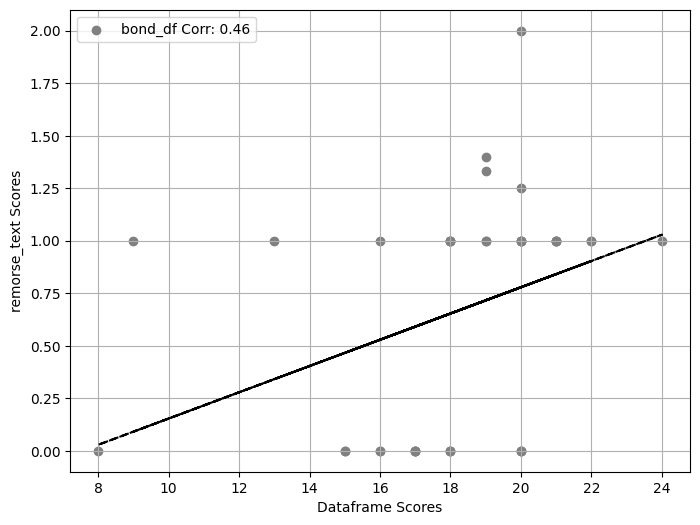

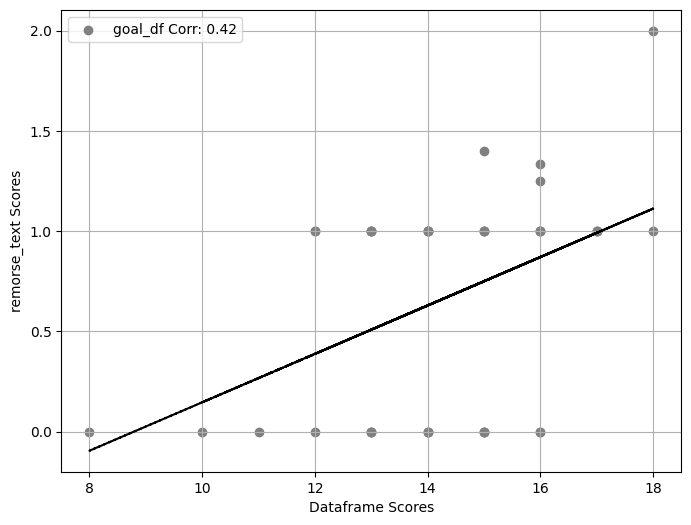

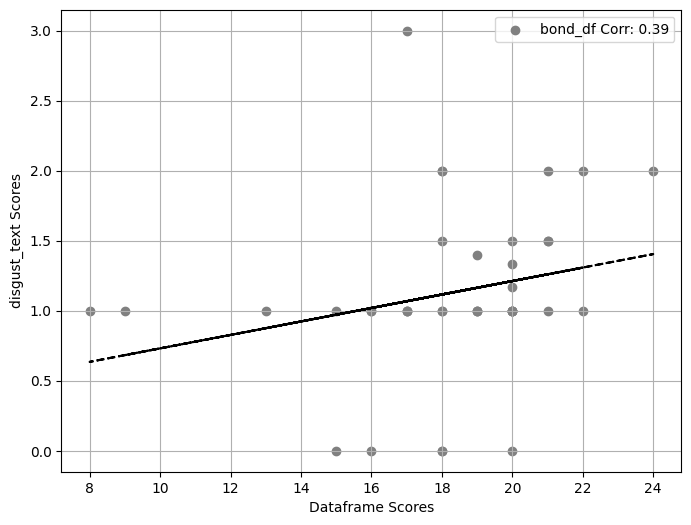

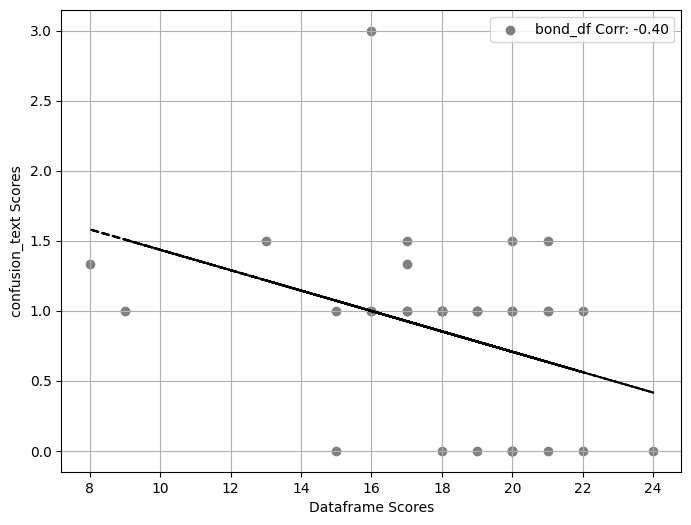

In [ ]:
df =text_emo
df.reset_index(drop=True, inplace=True)
df.fillna(0, inplace=True)
table_data = []
table = []

# remove the score columns
cols = df.columns

columns_to_exclude = ['ppnr', 'session','t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10','bond_df','goal_df'
,'task_df','total_wai','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','WAI_score']

# Remove specified columns from the DataFrame
features1 = [col for col in cols if col not in columns_to_exclude]


# # Assuming you have a DataFrame called 'df' with the desired columns
# bond_columns = ['t2', 't5', 't7','t9']
# goal_columns = ['t3', 't4', 't8']
# task_columns = ['t1', 't2', 't6', 't10']
# all_cols = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']

# # Calculate the row-wise average for the specified columns
# bond_df = df[bond_columns].sum(axis=1)
# goal_df = df[goal_columns].sum(axis=1)
# task_df = df[task_columns].sum(axis=1)
# total_wai = df[all_cols].sum(axis=1)

# Assuming you have a DataFrame called 'df' with the desired columns
bond_columns = ['3', '5', '7','9']
goal_columns = ['1', '4', '8','11']
task_columns = ['2', '6', '10','12']
all_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
# Calculate the row-wise average for the specified columns
bond_df = df[bond_columns].sum(axis=1)
goal_df = df[goal_columns].sum(axis=1)
task_df = df[task_columns].sum(axis=1)
total_wai = df[all_columns].sum(axis=1)



import numpy as np
from scipy.stats import pearsonr, spearmanr
from tabulate import tabulate
import matplotlib.pyplot as plt

# Set the significance level for the Bonferroni correction
alpha = 0.05
num_tests = 3  # Number of dataframes: bond_df, goal_df, task_df

correlation_results = []

for correlation_function in [pearsonr, spearmanr]:
    correlation_type = "pearson" if correlation_function == pearsonr else "spearman"

    for feature in features1:
        correlated_dataframes = []

        for dataframe_name, dataframe in [("bond_df", bond_df), ("goal_df", goal_df), ("task_df", task_df)]:
            val = feature

            # Calculate correlation coefficient and p-value using the selected method
            correlation_coefficient, p_value = correlation_function(df[val].astype(float), dataframe.astype(float))

            # Apply Bonferroni correction
            corrected_alpha = alpha / num_tests
            if p_value < corrected_alpha:
                correlated_dataframes.append([dataframe_name, f"{correlation_coefficient:.2f}", f"{p_value:.4f}"])

        if correlated_dataframes:
            correlation_results.append([feature, correlation_type, correlated_dataframes])

# Print results in a table
if correlation_results:
    headers = ["Feature", "Correlation Type", "Dataframe", "Correlation Coefficient", "p-value"]
    for result in correlation_results:
        feature_name = result[0]
        correlation_type = result[1]
        for corr_data in result[2]:
            table_data.append([feature_name, correlation_type] + corr_data)

    table = tabulate(table_data, headers=headers, tablefmt="pretty")
    # Save the table as a vector PDF
    plt.figure(figsize=(10, 6))
    plt.axis('off')
    plt.table(cellText=table_data, colLabels=headers, cellLoc='center', loc='center', colColours=['#f5f5f5']*len(headers))
    plt.savefig(f'correlation_table_{correlation_type}.pdf', format='pdf', bbox_inches='tight')
    plt.close()

    print("Correlation Results for Patient Scores and Dataframes:")
else:
    print("No correlations with p-value < 0.05 found.")

significant_features = {}

for correlation_function in [pearsonr, spearmanr]:
    correlation_type = "pearson" if correlation_function == pearsonr else "spearman"

    for feature in features1:
        correlated_dataframes = []

        for dataframe_name, dataframe in [("bond_df", bond_df), ("goal_df", goal_df), ("task_df", task_df)]:
            val = feature

            # Calculate correlation coefficient and p-value using the selected method
            correlation_coefficient, p_value = correlation_function(df[val].astype(float), dataframe.astype(float))

            # Apply Bonferroni correction
            corrected_alpha = alpha / num_tests
            if p_value < corrected_alpha:
                correlated_dataframes.append([dataframe_name, correlation_coefficient, p_value])

        if correlated_dataframes:
            significant_features[feature] = correlated_dataframes


# ... (Your existing code up to calculating significant features) ...

# Create scatter plots for significant features
for feature, correlations in significant_features.items():
    for dataframe_name, correlation_coefficient, _ in correlations:
        if dataframe_name == 'bond_df':
            dataframe = bond_df
        elif dataframe_name == 'goal_df':
            dataframe = goal_df
        elif dataframe_name == 'task_df':
            dataframe = task_df

        plt.figure(figsize=(8, 6))


        plt.scatter(dataframe, df[feature], color='grey', label=f"{dataframe_name} Corr: {correlation_coefficient:.2f}")

        # Fit and plot the correlation line
        slope, intercept = np.polyfit(dataframe, df[feature], 1)
        plt.plot(dataframe, slope * dataframe + intercept, color='black', linestyle='--')

        plt.xlabel("Dataframe Scores")
        plt.ylabel(f"{feature} Scores")
        plt.legend()
        plt.grid(True)
        plt.savefig(f"plots2/{feature}_{dataframe_name}_scatter_plot.pdf", format='pdf')
        plt.show()





In [ ]:
print(table)

+---------------------+------------------+-----------+-------------------------+---------+
|       Feature       | Correlation Type | Dataframe | Correlation Coefficient | p-value |
+---------------------+------------------+-----------+-------------------------+---------+
|  max_arousal_audio  |     pearson      |  bond_df  |          0.41           | 0.0156  |
|  min_valence_audio  |     pearson      |  bond_df  |          0.53           | 0.0010  |
|  min_valence_audio  |     pearson      |  goal_df  |          0.47           | 0.0046  |
|  min_valence_audio  |     pearson      |  task_df  |          0.45           | 0.0068  |
|  max_valence_audio  |     pearson      |  bond_df  |          0.56           | 0.0005  |
|  max_valence_audio  |     pearson      |  goal_df  |          0.50           | 0.0022  |
|  max_valence_audio  |     pearson      |  task_df  |          0.53           | 0.0011  |
| max_dominance_audio |     pearson      |  bond_df  |          0.41           | 0.0133  |

In [ ]:
audio = pd.read_csv('/content/audio_o.csv',delimiter=',')

movement = pd.read_csv('/content/movement_o.csv',delimiter=',')

face = pd.read_csv('/content/face_o.csv',delimiter=',')

text_va = pd.read_csv('/content/text_VA_o.csv', delimiter=',')

text_emo = pd.read_csv('/content/text_emo_o.csv', delimiter=',')

trento = pd.read_csv('/content/trentofeat_o.csv', delimiter=',')

table_data = []

In [ ]:
import pandas as pd
text_emo = pd.read_csv('/content/audio_t.csv', delimiter=';')
table_data = []

In [ ]:
text_emo

In [ ]:
df = text_emo
df.reset_index(drop=True, inplace=True)
df.fillna(0, inplace=True)

# remove the score columns
cols = df.columns

columns_to_exclude = ['ppnr', 'session','t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10','bond_df','goal_df'
,'task_df','total_wai','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','WAI_score','month_id']

# Remove specified columns from the DataFrame
features1 = [col for col in cols if col not in columns_to_exclude]


# Assuming you have a DataFrame called 'df' with the desired columns
bond_columns = ['3', '5', '7','9']
goal_columns = ['1', '4', '8','11']
task_columns = ['2', '6', '10','12']
all_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
# Calculate the row-wise average for the specified columns
bond_df = df[bond_columns].sum(axis=1)
goal_df = df[goal_columns].sum(axis=1)
task_df = df[task_columns].sum(axis=1)
total_wai = df[all_columns].sum(axis=1)


# # Assuming you have a DataFrame called 'df' with the desired columns
# bond_columns = ['t2', 't5', 't7','t9']
# goal_columns = ['t3', 't4', 't8']
# task_columns = ['t1', 't2', 't6', 't10']
# all_cols = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']

# # Calculate the row-wise average for the specified columns
# bond_df = df[bond_columns].sum(axis=1)
# goal_df = df[goal_columns].sum(axis=1)
# task_df = df[task_columns].sum(axis=1)
# total_wai = df[all_cols].sum(axis=1)


import numpy as np
from scipy.stats import pearsonr, spearmanr
from tabulate import tabulate
import matplotlib.pyplot as plt

# Set the significance level for the Bonferroni correction
alpha = 0.05
num_tests = 12  # Number of WAI questions

# Perform Pearson and Spearman correlations for features against WAI questions
correlation_results = []

for correlation_method in ['pearson', 'spearman']:
    for feature in features1:
        correlated_wai_questions = []

        for wai_question in range(1, num_tests + 1):
            question_col = str(wai_question)
            val = feature

            if correlation_method == 'pearson':
                correlation_function = pearsonr
            else:
                correlation_function = spearmanr

            # Calculate correlation coefficient and p-value
            correlation_coefficient, p_value = correlation_function(df[val].astype(float), df[question_col].astype(float))

            # Apply Bonferroni correction
            corrected_alpha = alpha / num_tests
            if p_value < corrected_alpha:
                correlated_wai_questions.append([f'WAI Question {wai_question}', f"{correlation_coefficient:.2f}", f"{p_value:.4f}"])

        if correlated_wai_questions:
            correlation_results.append([correlation_method, feature, correlated_wai_questions])

# Print and save results in a table
if correlation_results:
    headers = ["Correlation Type", "Feature", "WAI (Factors)", "Correlation Coefficient", "p-value"]
    for result in correlation_results:
        correlation_type = result[0]
        feature_name = result[1]
        for corr_data in result[2]:
            table_data.append([correlation_type, feature_name] + corr_data)

    table = tabulate(table_data, headers=headers, tablefmt="pretty")
    plt.figure(figsize=(10, 6))
    plt.axis('off')
    plt.table(cellText=table_data, colLabels=headers, cellLoc='center', loc='center', colColours=['#f5f5f5']*len(headers))
    plt.savefig(f'correlation_table_{correlation_type}.pdf', format='pdf', bbox_inches='tight')
    plt.close()

    print(f"Correlation Results for Patient Scores and {correlation_type.capitalize()} features:")
    print(table)
else:
    print("No correlations with p-value < 0.05 found.")

# Store significant features and their corresponding questions in a dictionary
significant_features = {}  # Format: {feature_name: [question_numbers]}
for result in correlation_results:
    feature_name = result[1]
    questions = [corr_data[0] for corr_data in result[2]]
    significant_features[feature_name] = questions

# Iterate through significant features and create scatter plots
for feature_name, questions in significant_features.items():
    for question in questions:
        question_number = int(question.split()[-1])  # Extract question number
        plt.figure(figsize=(8, 6))
        plt.scatter(df[feature_name], df[str(question_number)], color='b', alpha=0.5, label=f"Corr: {correlation_coefficient:.2f}")

        # Fit and plot the correlation line
        slope, intercept = np.polyfit(df[feature_name], df[str(question_number)], 1)
        x_values = np.linspace(df[feature_name].min(), df[feature_name].max(), 100)
        y_values = slope * x_values + intercept
        plt.plot(x_values, y_values, color='red', linestyle='--')

        plt.title(f'{feature_name} vs WAI Question {question_number}')
        plt.xlabel(feature_name)
        plt.ylabel(f'WAI Question {question_number}')
        plt.grid(True)
        # plt.savefig(f"plots_o/{feature_name}_{question_number}_scatter_plot.pdf", format='pdf')
        plt.show()






KeyError: ignored

# Heatmaps on mrmr selected features

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/12-8_o.csv', delimiter=',')
df.reset_index(drop=True, inplace=True)

# Assuming you have a DataFrame called 'df' with the desired columns
bond_columns = ['3', '5', '7','9']
goal_columns = ['1', '4', '8','11']
task_columns = ['2', '6', '10','12']
all_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
# Calculate the row-wise average for the specified columns
bond_df = df[bond_columns].sum(axis=1)
goal_df = df[goal_columns].sum(axis=1)
task_df = df[task_columns].sum(axis=1)
total_wai = df[all_columns].sum(axis=1)

df['total_wai'] = total_wai

In [ ]:
cols = df.columns

columns_to_exclude = ['ppnr', 'session','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','bond_df','goal_df'
,'task_df']

# Remove specified columns from the DataFrame
cols_cleaned = [col for col in cols if col not in columns_to_exclude]
cols_cleaned

In [ ]:
mrmr_feat_observer = ['min_valence_audio' ,'min_arousal_SPEAKER_01' ,'realization_text' ,'caring_text' ,'approval_score_avg_change' ,'sadness_score_avg_change' ,
'admiration_text', 'curiosity_text' ,'relief_text' ,'fear_score_avg_change' ,'durationpercentage_patient_avg_change', 'min_valence_SPEAKER_01' ,
'nr_positive_text' ,'min_valence_SPEAKER_00' ,'disgust_text', 'valence_scores_avg_change', 'remorse_text' ,
'neutral_text', 'duration_therapist_avg_change' ,'surprise_text', 'max_arousal_audio', 'turns_therapist_avg_change', 'max_dominance_audio' ,
'min_dominance_audio' ,'anger_text' ,'durationpercentage_therapist' ,'max_valence_audio' ,'min_arousal_audio' ,'turns_therapist' ,'sadness_text' ,
'durationpercentage_therapist_avg_change', 'speechduration_therapist', 'nr_negative_text', 'wordcount_speaker_therapist' ,'disapproval_score_avg_change' ,
'amusement_score_avg_change', 'arousal_scores_SPEAKER_00_avg_change', 'realization_score_avg_change', 'speechrate_speaker_therapist_avg_change' ,'approval_text' ,'fear_text' ,
'avgturnlength_therapist', 'duration_therapist' ,'nr_of_turns', 'curiosity_score_avg_change', 'neutral_score_avg_change' ,'arousal_scores_SPEAKER_01_avg_change' ,
'turn_level_freedom']

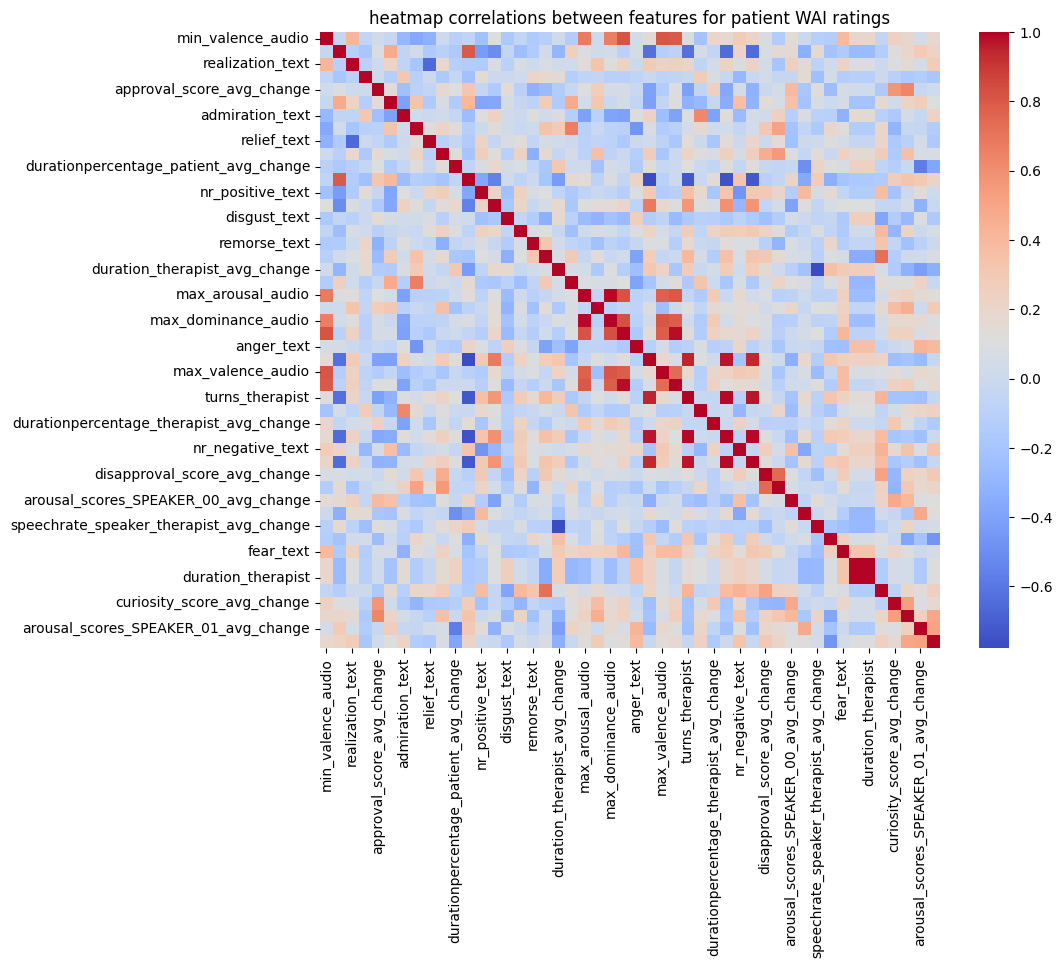

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the features
features = mrmr_feat_observer

# Create a correlation matrix
correlation_matrix = df[features].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("heatmap correlations between features for patient WAI ratings")
plt.show()



# plots for model performance

In [ ]:
Patient data mrmr
Baseline RMSE: 5.803805096360376

SVR regression
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Cross-Validation RMSE Scores: 5.824540998670881
Mean Cross-Validation RMSE: 5.824540998670881
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: 0.11338545454640492
Mean Cross-Validation R-squared: 0.11338545454640492
Mean Absolute Error (MAE): 4.018588880358291

RF
Best Hyperparameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
Cross-validation MSE: 33.93228919053137
Mean MSE: 33.93228919053137
R-squared for total wai: 0.47161514996314646
Mean Absolute Error for total wai: 4.353828772681506
Out-of-Bag RMSE: 5.8251428472211195

Multilinear
Cross-Validation Root Mean Squared Error (RMSE): 11.915739138367345
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation Mean Squared Error (MSE): 141.98483921361935
Cross-Validation Variance (R-squared): -3.2151820382451133
Cross-Validation Mean Absolute Error (MAE): 8.168230784060256


XGB
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}
Cross-Validation RMSE Scores: 7.1625000723361
Mean Cross-Validation RMSE: 7.1625000723361
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: -0.340728117533609
Mean Cross-Validation R-squared: -0.340728117533609
Mean Absolute Error (MAE): 5.281004176420324

KNN
{'n_neighbors': 9, 'weights': 'uniform'}
KNeighborsRegressor(n_neighbors=9)
Best Mean Squared Error: 23.208504801097398
R-squared: -0.428486997635934
RMSE: 4.817520607231213
Coefficient of Variation: 0.11664538358338941
MAE: 4.234567901234568

Elastic Net
Best Parameters: {'alpha': 1, 'l1_ratio': 0.9}
Cross-Validation RMSE Scores: 5.782062088080626
Mean Cross-Validation RMSE: 5.782062088080626
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: 0.12627061829573627
Mean Cross-Validation R-squared: 0.12627061829573627
Cross-Validation MAE: 4.383450221245902

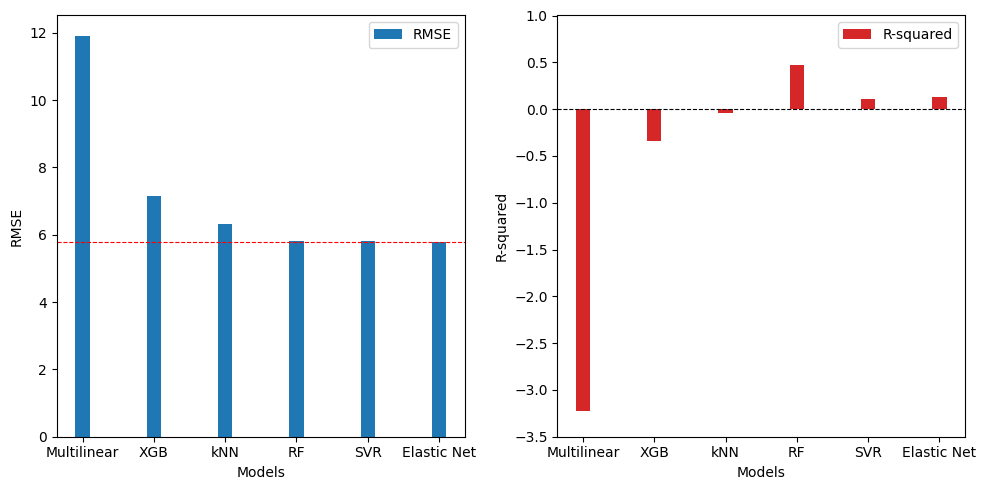

In [ ]:
# patient
import matplotlib.pyplot as plt
import numpy as np

# Define model names
model_names = ['Multilinear', 'XGB', 'kNN', 'RF', 'SVR','Elastic Net']

# Define metric values for each model
metrics = {
    'Multilinear': {
        'RMSE': 11.92,
        'R-squared': -3.22,
    },
    'XGB': {
        'RMSE': 7.16,
        'R-squared': -0.34,
    },
    'kNN': {
        'RMSE': 6.316,
        'R-squared': -0.042,
    },
    'RF': {
        'RMSE':  5.825,
        'R-squared': 0.4716,
    },
    'SVR': {
        'RMSE': 5.82,
        'R-squared': 0.11,
    },
    'Elastic Net': {
        'RMSE':  5.78,
        'R-squared': 0.13,
    }
}

# Create positions for the bars
num_models = len(model_names)
bar_width = 0.2
locations = np.arange(num_models)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot RMSE values on the left figure
rmse_values = [metrics[model]['RMSE'] for model in model_names]
ax1.bar(locations, rmse_values, width=bar_width, label='RMSE', align='center', color='tab:blue')
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE')
ax1.set_xticks(locations)
ax1.set_xticklabels(model_names)
ax1.legend()
ax1.axhline(y=5.80, color='red', linewidth=0.8, linestyle='--')

# Plot R-squared values on the right figure
r_squared_values = [metrics[model]['R-squared'] for model in model_names]
ax2.bar(locations, r_squared_values, width=bar_width, label='R-squared', align='center', color='tab:red')
ax2.set_ylim(-3.5, 1)
ax2.set_xlabel('Models')
ax2.set_ylabel('R-squared')
ax2.set_xticks(locations)
ax2.set_xticklabels(model_names)
ax2.legend()
ax2.axhline(y=0, color='black', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.savefig("model_comparison_patient.pdf", format='pdf')
plt.savefig("model_comparison_patient.png", format='png')
plt.show()


In [ ]:
observer data mrmr
Baseline RMSE: 9.500364225398146

SVR regression
Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Cross-Validation RMSE Scores: 10.008757339866218
Mean Cross-Validation RMSE: 10.008757339866218
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: 0.06849998822687342
Mean Cross-Validation R-squared: 0.06849998822687342
Mean Absolute Error (MAE): 7.326421077126389

RF
Best Hyperparameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Cross-validation MSE: 115.78103126152364
Mean MSE: 115.78103126152364
R-squared for total wai: 0.3872946379795337
Mean Absolute Error for total wai: 7.566437456334516
Out-of-Bag RMSE: 10.760159444056749

Multilinear
Cross-Validation Root Mean Squared Error (RMSE): 12.843390492135098
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation Mean Squared Error (MSE): 164.95267933346622
Cross-Validation Variance (R-squared): -0.8275903783843408
Cross-Validation Mean Absolute Error (MAE): 9.330616306284092

# Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}

XGB
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300}
Cross-Validation RMSE Scores: 11.289798567797376
Mean Cross-Validation RMSE: 11.289798567797376
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: -0.18520897459564734
Mean Cross-Validation R-squared: -0.18520897459564734
Mean Absolute Error (MAE): 8.552129109700521

KNN
{'n_neighbors': 9, 'weights': 'uniform'}
KNeighborsRegressor(n_neighbors=9)
Best Mean Squared Error: 23.208504801097398
R-squared: -0.428486997635934
RMSE: 4.817520607231213
Coefficient of Variation: 0.11664538358338941
MAE: 4.234567901234568

Elastic Net
Best Parameters: {'alpha': 10, 'l1_ratio': 0.5}
Cross-Validation RMSE Scores: 10.401276118654941
Mean Cross-Validation RMSE: 10.401276118654941
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: -0.00599493902331294
Mean Cross-Validation R-squared: -0.00599493902331294
Cross-Validation MAE: 7.125861792528461

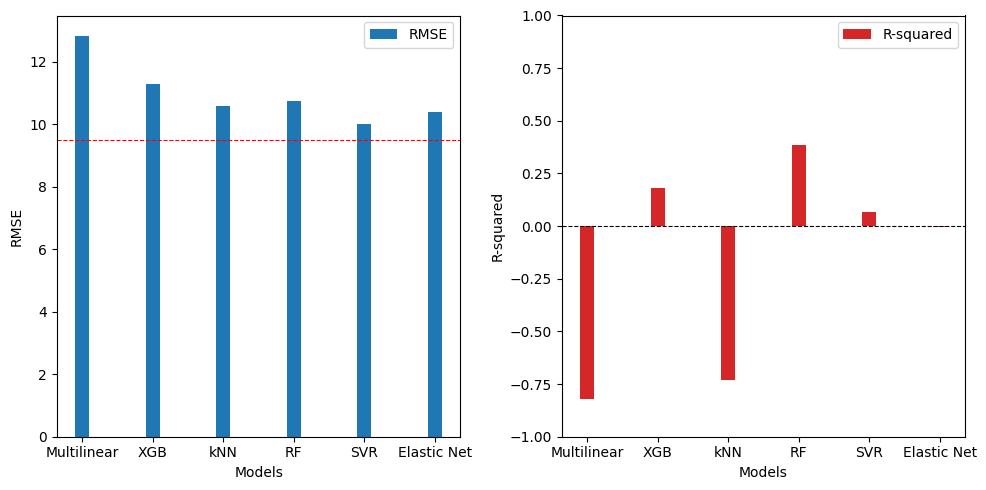

In [ ]:
# observer
import matplotlib.pyplot as plt
import numpy as np

# Define model names
model_names = ['Multilinear', 'XGB', 'kNN', 'RF', 'SVR','Elastic Net']

# Define metric values for each model
metrics = {
    'Multilinear': {
        'RMSE': 12.84,
        'R-squared': -0.82,
    },
    'XGB': {
        'RMSE': 11.29,
        'R-squared': 0.18,
    },
    'kNN': {
        'RMSE': 10.6,
        'R-squared': -0.729,
    },
    'RF': {
        'RMSE':  10.76,
        'R-squared': 0.3872,
    },
    'SVR': {
        'RMSE': 10.0,
        'R-squared': 0.068,
    },
    'Elastic Net': {
        'RMSE':  10.4,
        'R-squared': -0.005,
    }
}

# Create positions for the bars
num_models = len(model_names)
bar_width = 0.2
locations = np.arange(num_models)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot RMSE values on the left figure
rmse_values = [metrics[model]['RMSE'] for model in model_names]
ax1.bar(locations, rmse_values, width=bar_width, label='RMSE', align='center', color='tab:blue')
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE')
ax1.set_xticks(locations)
ax1.set_xticklabels(model_names)
ax1.legend()
ax1.axhline(y=9.5, color='red', linewidth=0.8, linestyle='--')

# Plot R-squared values on the right figure
r_squared_values = [metrics[model]['R-squared'] for model in model_names]
ax2.bar(locations, r_squared_values, width=bar_width, label='R-squared', align='center', color='tab:red')
ax2.set_ylim(-1, 1)
ax2.set_xlabel('Models')
ax2.set_ylabel('R-squared')
ax2.set_xticks(locations)
ax2.set_xticklabels(model_names)
ax2.legend()
ax2.axhline(y=0, color='black', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.savefig("model_comparison_observer.pdf", format='pdf')
plt.savefig("model_comparison_observer.png", format='png')
plt.show()


In [ ]:
# therapist

# multilinear
Cross-Validation Root Mean Squared Error (RMSE): 7.3417753346724846
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation Mean Squared Error (MSE): 53.90166506480528
Cross-Validation Variance (R-squared): -3.0611656287131765
Cross-Validation Mean Absolute Error (MAE): 6.2259671070085005

# xgb
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300}
Cross-Validation RMSE Scores: 4.746598367524961
Mean Cross-Validation RMSE: 4.746598367524961
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: -0.6762115081952158
Mean Cross-Validation R-squared: -0.6762115081952158
Mean Absolute Error (MAE): 3.8780024956012595

# knn
Best Parameters: {'alpha': 0.01, 'kernel': 'polynomial'}
Best Estimator: KernelRidge(alpha=0.01, kernel='polynomial')
Cross-Validation RMSE Scores: 7.348275284746552
Mean Cross-Validation RMSE: 7.348275284746552
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: -3.0173038627398014
Mean Cross-Validation R-squared: -3.0173038627398014
Cross-Validation MAE: 5.702870783768836

# svr
Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Cross-Validation RMSE Scores: 3.80548690940639
Mean Cross-Validation RMSE: 3.80548690940639
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: -0.0774182103197909
Mean Cross-Validation R-squared: -0.0774182103197909
Mean Absolute Error (MAE): 3.0855244162999944

# elastic net
Best Parameters: {'alpha': 10, 'l1_ratio': 0.2}
Cross-Validation RMSE Scores: 3.8650863551672696
Mean Cross-Validation RMSE: 3.8650863551672696
Standard Deviation of Cross-Validation RMSE: 0.0
Cross-Validation R-squared Scores: -0.11143034502557292
Mean Cross-Validation R-squared: -0.11143034502557292
Cross-Validation MAE: 3.144240379810094

# rf
Cross-validation MSE: 15.587333920536624
Mean MSE: 15.587333920536624
R-squared for total wai: 0.4279206014918464
Mean Absolute Error for total wai: 3.289575161566653
RMSE: 3.9480797763642803

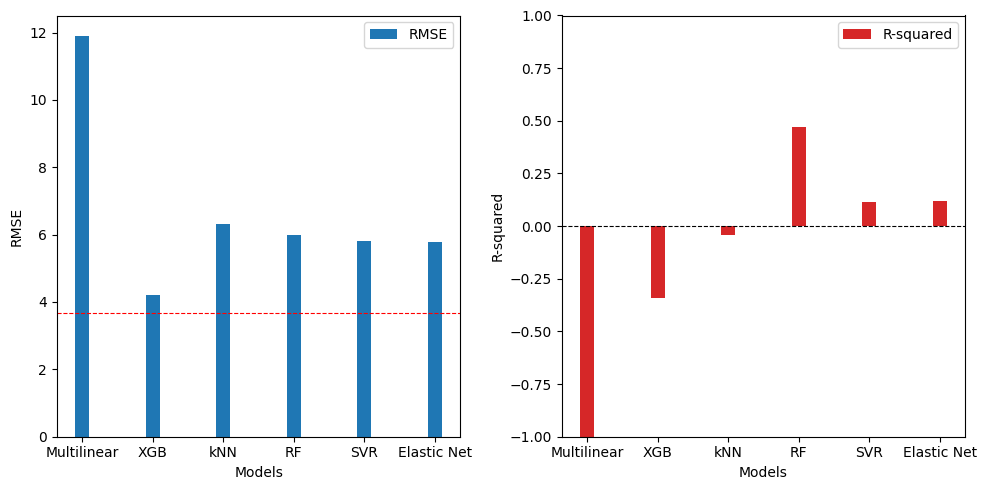

In [ ]:
# therapist
import matplotlib.pyplot as plt
import numpy as np

# Define model names
model_names = ['Multilinear', 'XGB', 'kNN', 'RF', 'SVR','Elastic Net']

# Define metric values for each model
metrics = {
    'Multilinear': {
        'RMSE': 11.91,
        'R-squared': -3.21,
    },
    'XGB': {
        'RMSE': 4.21,
        'R-squared': -0.340,
    },
    'kNN': {
        'RMSE':  6.316,
        'R-squared': -0.042,
    },
    'RF': {
        'RMSE':  6.00,
        'R-squared': 0.471,
    },
    'SVR': {
        'RMSE': 5.824,
        'R-squared': 0.113,
    },
    'Elastic Net': {
        'RMSE':  5.782,
        'R-squared': 0.12,
    }
}

# Create positions for the bars
num_models = len(model_names)
bar_width = 0.2
locations = np.arange(num_models)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot RMSE values on the left figure
rmse_values = [metrics[model]['RMSE'] for model in model_names]
ax1.bar(locations, rmse_values, width=bar_width, label='RMSE', align='center', color='tab:blue')
ax1.set_xlabel('Models')
ax1.set_ylabel('RMSE')
ax1.set_xticks(locations)
ax1.set_xticklabels(model_names)
ax1.legend()
ax1.axhline(y=3.6687, color='red', linewidth=0.8, linestyle='--')

# Plot R-squared values on the right figure
r_squared_values = [metrics[model]['R-squared'] for model in model_names]
ax2.bar(locations, r_squared_values, width=bar_width, label='R-squared', align='center', color='tab:red')
ax2.set_ylim(-1, 1)
ax2.set_xlabel('Models')
ax2.set_ylabel('R-squared')
ax2.set_xticks(locations)
ax2.set_xticklabels(model_names)
ax2.legend()
ax2.axhline(y=0, color='black', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.savefig("model_comparison_therapist.pdf", format='pdf')
plt.savefig("model_comparison_therapist.png", format='png')
plt.show()


# comparison feature selection method plots

## patient

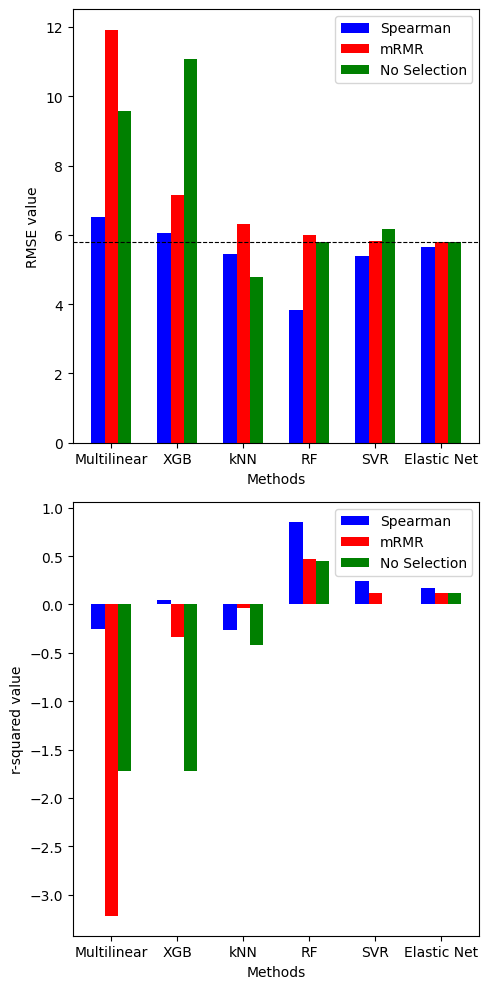

In [ ]:
# patient
import matplotlib.pyplot as plt
import numpy as np

# Data for Spearman feature selection
methods = ['Multilinear', 'XGB', 'kNN', 'RF','SVR','Elastic Net']
spearman_rmse = [6.50, 6.058, 5.44, 3.825,5.3942,5.63820]
mrmr_rmse = [11.92, 7.16, 6.3, 6,5.824,5.782]
no_selection_rmse = [9.576, 11.06, 4.79, 5.782,6.1567,5.795]
baseline = 5.803

spearman_rmse_norm = spearman_rmse
mrmr_rmse_norm = mrmr_rmse
no_selection_rmse_norm = no_selection_rmse

bar_width = 0.2
index = np.arange(len(methods))

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))

# Plot RMSE values
axes[0].bar(index, spearman_rmse_norm, bar_width, color='blue', label='Spearman')
axes[0].bar(index + bar_width, mrmr_rmse_norm, bar_width, color='red', label='mRMR')
axes[0].bar(index + 2 * bar_width, no_selection_rmse_norm, bar_width, color='green', label='No Selection')
axes[0].axhline(y=baseline, color='black', linewidth=0.8, linestyle='--')
axes[0].set_xlabel('Methods')
axes[0].set_ylabel('RMSE value')
axes[0].set_xticks(index + bar_width)
axes[0].set_xticklabels(methods)
axes[0].legend()

# patient
import matplotlib.pyplot as plt
import numpy as np

# Data for different feature selection methods
methods = ['Multilinear', 'XGB', 'kNN', 'RF','SVR','Elastic Net']
spearman_r_squared = [-0.255, 0.0406, -0.26, 0.855, 0.23954, 0.169]
mrmr_r_squared = [-3.22,-0.34,-0.042,0.47,0.113,0.1223]
no_selection_r_squared = [-1.722, -1.72, -0.42, 0.45,0.0093,0.122]

spearman_r_squared_norm = spearman_r_squared
mrmr_r_squared_norm = mrmr_r_squared
no_selection_r_squared_norm = no_selection_r_squared

# Plot r-squared values
axes[1].bar(index, spearman_r_squared_norm, bar_width, color='blue', label='Spearman')
axes[1].bar(index + bar_width, mrmr_r_squared_norm, bar_width, color='red', label='mRMR')
axes[1].bar(index + 2 * bar_width, no_selection_r_squared_norm, bar_width, color='green', label='No Selection')
axes[1].set_xlabel('Methods')
axes[1].set_ylabel('r-squared value')
axes[1].set_xticks(index + bar_width)
axes[1].set_xticklabels(methods)
axes[1].legend()

# Adjust layout and save
plt.tight_layout()
plt.savefig("featmethod_comparison_patient_subplots.pdf", format='pdf')
plt.savefig("featmethod_comparison_patient_subplots.png", format='png')
plt.show()

# table for this data
# from tabulate import tabulate

# # Data for RMSE values
# methods = ['Multilinear', 'XGB', 'kNN', 'RF', 'SVR', 'Elastic Net']
# spearman_rmse = [6.50, 6.058, 5.44, 3.825, 5.3942, 5.63820]
# mrmr_rmse = [11.92, 6.63, 8.29, 5.825, 6.156, 5.79]
# no_selection_rmse = [9.576, 11.06, 4.79, 5.782, 6.1567, 5.795]
# baseline = 5.803

# # Create a list of lists for the RMSE table
# rmse_table_data = []
# for method, spearman, mrmr, no_selection in zip(methods, spearman_rmse, mrmr_rmse, no_selection_rmse):
#     rmse_table_data.append([method, spearman, mrmr, no_selection])

# # Add baseline row to the table data
# rmse_table_data.append(['Baseline', baseline, baseline, baseline])

# # Print the RMSE table
# rmse_headers = ['Method', 'Spearman', 'mRMR', 'No Selection']
# rmse_table = tabulate(rmse_table_data, headers=rmse_headers, tablefmt='grid')
# print("RMSE Table:")
# print(rmse_table)

# print("\n")

# # Data for R-squared values
# spearman_r_squared = [-0.255, 0.0406, -0.26, 0.855, 0.23954, 0.169]
# mrmr_r_squared = [-3.22, -0.34, -0.43, 0.47, 0.009, 0.1223]
# no_selection_r_squared = [-1.722, -1.72, -0.42, 0.45, 0.0093, 0.122]

# # Create a list of lists for the R-squared table
# r_squared_table_data = []
# for method, spearman, mrmr, no_selection in zip(methods, spearman_r_squared, mrmr_r_squared, no_selection_r_squared):
#     r_squared_table_data.append([method, spearman, mrmr, no_selection])

# # Print the R-squared table
# r_squared_headers = ['Method', 'Spearman', 'mRMR', 'No Selection']
# r_squared_table = tabulate(r_squared_table_data, headers=r_squared_headers, tablefmt='grid')
# print("R-squared Table:")
# print(r_squared_table)


In [ ]:
\section{RMSE Table}

\begin{table}[ht]
\centering
\begin{tabular}{lccc}
\toprule
Method & Spearman & mRMR & No Selection \\
\midrule
Multilinear & 6.50 & 11.92 & 9.576 \\
XGB & 6.058 & 6.63 & 11.06 \\
kNN & 5.44 & 8.29 & 4.79 \\
RF & 3.825 & 5.825 & 5.782 \\
SVR & 5.3942 & 6.156 & 6.1567 \\
Elastic Net & 5.63820 & 5.79 & 5.795 \\
Baseline & 5.803 & 5.803 & 5.803 \\
\bottomrule
\end{tabular}
\caption{RMSE values for different methods.}
\end{table}

\section{R-squared Table}

\begin{table}[ht]
\centering
\begin{tabular}{lccc}
\toprule
Method & Spearman & mRMR & No Selection \\
\midrule
Multilinear & -0.255 & -3.22 & -1.722 \\
XGB & 0.0406 & -0.34 & -1.72 \\
kNN & -0.26 & -0.43 & -0.42 \\
RF & 0.855 & 0.47 & 0.45 \\
SVR & 0.23954 & 0.009 & 0.0093 \\
Elastic Net & 0.169 & 0.1223 & 0.122 \\
\bottomrule
\end{tabular}
\caption{R-squared values for different methods.}
\end{table}

## therapist

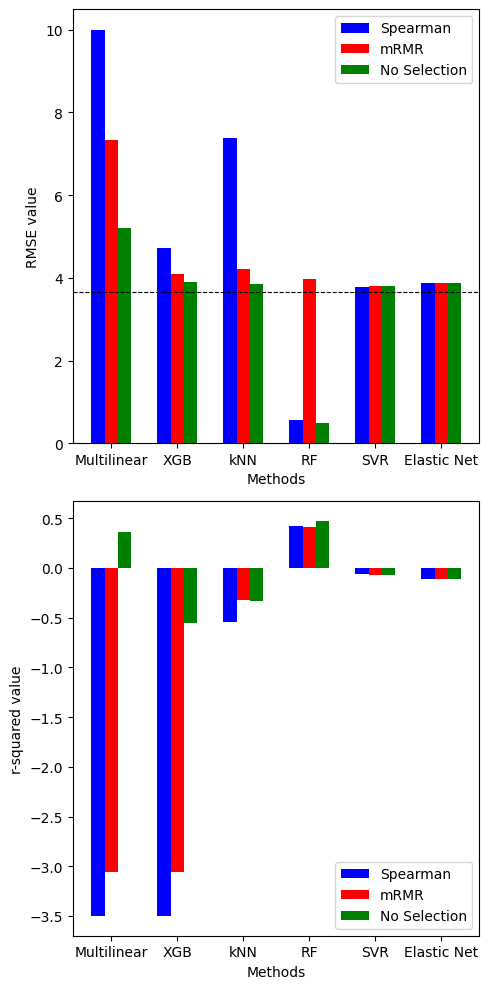

In [ ]:
# therapist
import matplotlib.pyplot as plt
import numpy as np

# Data for Spearman feature selection
methods = ['Multilinear', 'XGB', 'kNN', 'RF','SVR','Elastic Net']
mrmr_rmse = [7.34, 4.08, 4.21, 3.969,3.805,3.865]
no_selection_rmse = [5.20, 3.91, 3.85, 0.48,3.801,3.865]
spearman_rmse = [10, 4.722, 7.3915, 0.57,3.7756,3.8650]
baseline = 3.6687

spearman_rmse_norm = spearman_rmse
mrmr_rmse_norm = mrmr_rmse
no_selection_rmse_norm = no_selection_rmse

bar_width = 0.2
index = np.arange(len(methods))

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))

# Plot RMSE values
axes[0].bar(index, spearman_rmse_norm, bar_width, color='blue', label='Spearman')
axes[0].bar(index + bar_width, mrmr_rmse_norm, bar_width, color='red', label='mRMR')
axes[0].bar(index + 2 * bar_width, no_selection_rmse_norm, bar_width, color='green', label='No Selection')
axes[0].axhline(y=baseline, color='black', linewidth=0.8, linestyle='--')
axes[0].set_xlabel('Methods')
axes[0].set_ylabel('RMSE value')
axes[0].set_xticks(index + bar_width)
axes[0].set_xticklabels(methods)
axes[0].legend()

# patient
import matplotlib.pyplot as plt
import numpy as np

# Data for different feature selection methods
methods = ['Multilinear', 'XGB', 'kNN', 'RF','SVR','Elastic Net']
mrmr_r_squared = [-3.06, -3.06, -0.32, 0.416, -0.07,-0.111]
no_selection_r_squared = [0.36, -0.55, -0.33, 0.47,-0.0751,-0.111]
spearman_r_squared = [-3.5,-3.5, -0.539, 0.42,-0.060,-0.111]

spearman_r_squared_norm = spearman_r_squared
mrmr_r_squared_norm = mrmr_r_squared
no_selection_r_squared_norm = no_selection_r_squared

# Plot r-squared values
axes[1].bar(index, spearman_r_squared_norm, bar_width, color='blue', label='Spearman')
axes[1].bar(index + bar_width, mrmr_r_squared_norm, bar_width, color='red', label='mRMR')
axes[1].bar(index + 2 * bar_width, no_selection_r_squared_norm, bar_width, color='green', label='No Selection')
axes[1].set_xlabel('Methods')
axes[1].set_ylabel('r-squared value')
axes[1].set_xticks(index + bar_width)
axes[1].set_xticklabels(methods)
axes[1].legend()

# Adjust layout and save
plt.tight_layout()
plt.savefig("featmethod_comparison_therapist_subplots.pdf", format='pdf')
plt.savefig("featmethod_comparison_therapist_subplots.png", format='png')
plt.show()


## observer

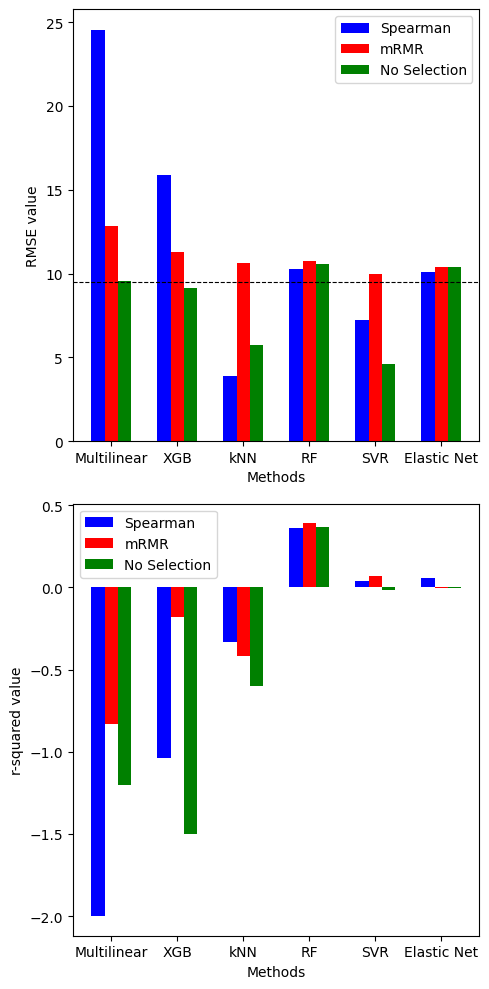

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Spearman feature selection
methods = ['Multilinear', 'XGB', 'kNN', 'RF', 'SVR', 'Elastic Net']
mrmr_rmse = [7.34, 4.08, 4.21, 3.969,3.805,3.865]
no_selection_rmse = [5.20, 3.91, 3.85, 0.48,3.801,3.865]
spearman_rmse = [10, 4.722, 7.3915, 0.57,3.7756,3.8650]

baseline = 9.50

spearman_rmse_norm = spearman_rmse
mrmr_rmse_norm = mrmr_rmse
no_selection_rmse_norm = no_selection_rmse

bar_width = 0.2
index = np.arange(len(methods))

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))

# Plot RMSE values
axes[0].bar(index, spearman_rmse_norm, bar_width, color='blue', label='Spearman')
axes[0].bar(index + bar_width, mrmr_rmse_norm, bar_width, color='red', label='mRMR')
axes[0].bar(index + 2 * bar_width, no_selection_rmse_norm, bar_width, color='green', label='No Selection')
axes[0].axhline(y=baseline, color='black', linewidth=0.8, linestyle='--')
axes[0].set_xlabel('Methods')
axes[0].set_ylabel('RMSE value')
axes[0].set_xticks(index + bar_width)
axes[0].set_xticklabels(methods)
axes[0].legend()

# Data for different feature selection methods
spearman_r_squared = [-2, -1.04, -0.334, 0.36, 0.039, 0.055]
mrmr_r_squared = [-0.83, -0.18, -0.42, 0.39, 0.0684, -0.0059]
spearman_r_squared = [-2, -1.04, -0.334, 0.36, 0.039, 0.055]
no_selection_r_squared = [-1.20, -1.5, -0.6, 0.37, -0.019, -0.0059] #no_selection_r_squared for XGB and  mulilinear changed

spearman_r_squared_norm = spearman_r_squared
mrmr_r_squared_norm = mrmr_r_squared
no_selection_r_squared_norm = no_selection_r_squared

# Plot r-squared values
axes[1].bar(index, spearman_r_squared_norm, bar_width, color='blue', label='Spearman')
axes[1].bar(index + bar_width, mrmr_r_squared_norm, bar_width, color='red', label='mRMR')
axes[1].bar(index + 2 * bar_width, no_selection_r_squared_norm, bar_width, color='green', label='No Selection')
axes[1].set_xlabel('Methods')
axes[1].set_ylabel('r-squared value')
axes[1].set_xticks(index + bar_width)
axes[1].set_xticklabels(methods)
axes[1].legend()

# Adjust layout and save
plt.tight_layout()
plt.savefig("featmethod_comparison_observer_subplots.pdf", format='pdf')
plt.savefig("featmethod_comparison_observer_subplots.png", format='png')
plt.show()


## merged

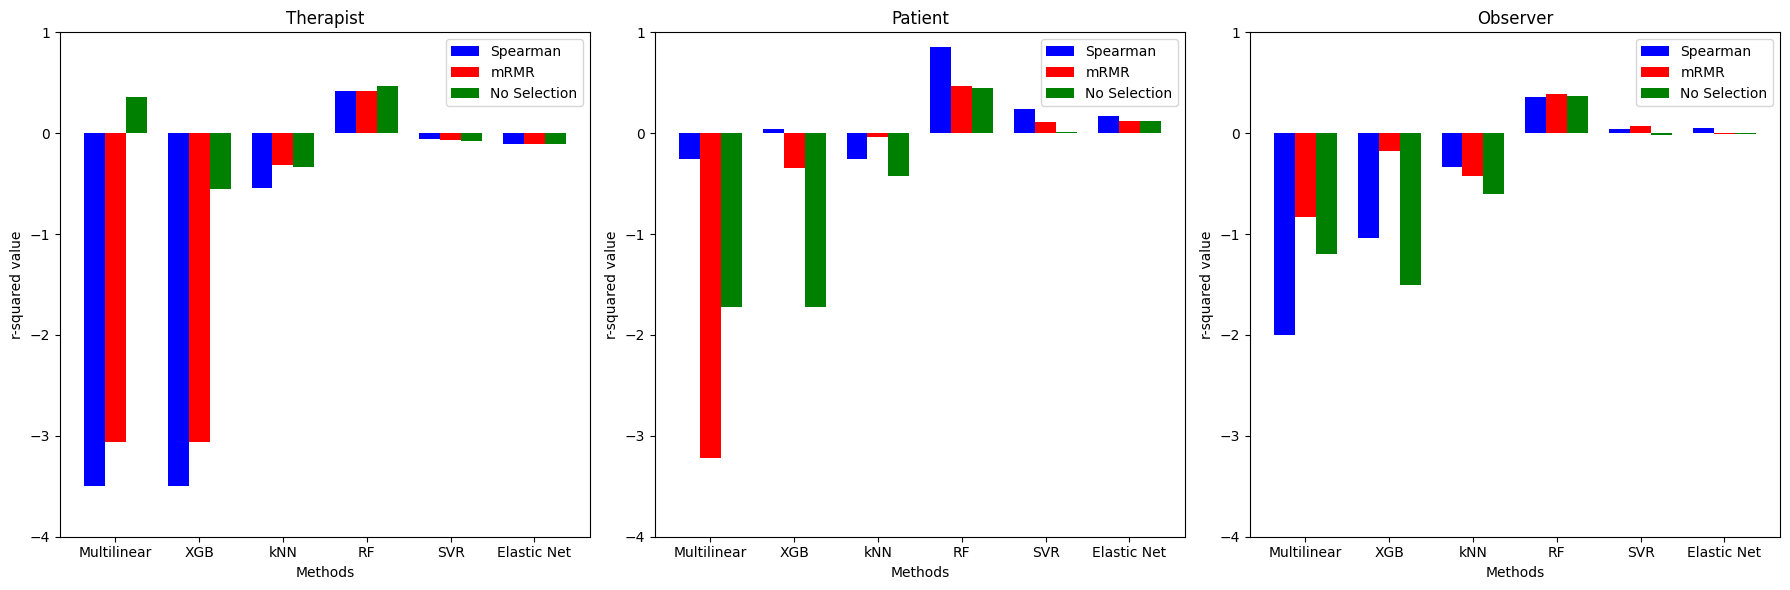

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

methods = ['Multilinear', 'XGB', 'kNN', 'RF','SVR','Elastic Net']
mrmr_r_squared = [-3.06, -3.06, -0.32, 0.416, -0.07,-0.111]
no_selection_r_squared = [0.36, -0.55, -0.33, 0.47,-0.0751,-0.111]
spearman_r_squared = [-3.5,-3.5, -0.539, 0.42,-0.060,-0.111]


# Normalize data
def normalize_data(data):
    max_value = max(data)
    return data

mrmr_rmse_norm = normalize_data(mrmr_r_squared)
no_selection_rmse_norm = normalize_data(no_selection_r_squared)
spearman_rmse_norm = normalize_data(spearman_r_squared)

bar_width = 0.25
index = np.arange(len(methods))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Set y-axis limits
y_limit = (-4, 1)

# Plotting for therapist
axes[0].bar(index, spearman_rmse_norm, bar_width, color='blue', label='Spearman')
axes[0].bar(index + bar_width, mrmr_rmse_norm, bar_width, color='red', label='mRMR')
axes[0].bar(index + 2 * bar_width, no_selection_rmse_norm, bar_width, color='green', label='No Selection')
axes[0].set_xlabel('Methods')
axes[0].set_ylabel('r-squared value')
axes[0].set_title('Therapist')
axes[0].set_xticks(index + bar_width)
axes[0].set_xticklabels(methods)
axes[0].legend()
axes[0].set_ylim(y_limit)

spearman_r_squared = [-0.255, 0.0406, -0.26, 0.855, 0.23954, 0.169]
mrmr_r_squared = [-3.22,-0.34,-0.042,0.47,0.113,0.1223]
no_selection_r_squared = [-1.722, -1.72, -0.42, 0.45,0.0093,0.122]


# Plotting for patient
axes[1].bar(index, spearman_r_squared, bar_width, color='blue', label='Spearman')
axes[1].bar(index + bar_width, mrmr_r_squared, bar_width, color='red', label='mRMR')
axes[1].bar(index + 2 * bar_width, no_selection_r_squared, bar_width, color='green', label='No Selection')
axes[1].set_xlabel('Methods')
axes[1].set_ylabel('r-squared value')
axes[1].set_title('Patient')
axes[1].set_xticks(index + bar_width)
axes[1].set_xticklabels(methods)
axes[1].legend()
axes[1].set_ylim(y_limit)

spearman_r_squared = [-2, -1.04, -0.334, 0.36, 0.039, 0.055]
mrmr_r_squared = [-0.83, -0.18, -0.42, 0.39, 0.0684, -0.0059]
spearman_r_squared = [-2, -1.04, -0.334, 0.36, 0.039, 0.055]
no_selection_r_squared = [-1.20, -1.5, -0.6, 0.37, -0.019, -0.0059]


# Plotting for observer
axes[2].bar(index, spearman_r_squared, bar_width, color='blue', label='Spearman')
axes[2].bar(index + bar_width, mrmr_r_squared, bar_width, color='red', label='mRMR')
axes[2].bar(index + 2 * bar_width, no_selection_r_squared, bar_width, color='green', label='No Selection')
axes[2].set_xlabel('Methods')
axes[2].set_ylabel('r-squared value')
axes[2].set_title('Observer')
axes[2].set_xticks(index + bar_width)
axes[2].set_xticklabels(methods)
axes[2].legend()
axes[2].set_ylim(y_limit)

# Adjust layout
plt.tight_layout()
plt.savefig("Comparison of Feature Selection Methods (R-squared).pdf", format='pdf')
plt.savefig("Comparison of Feature Selection Methods (R-squared).png", format='png')
plt.show()


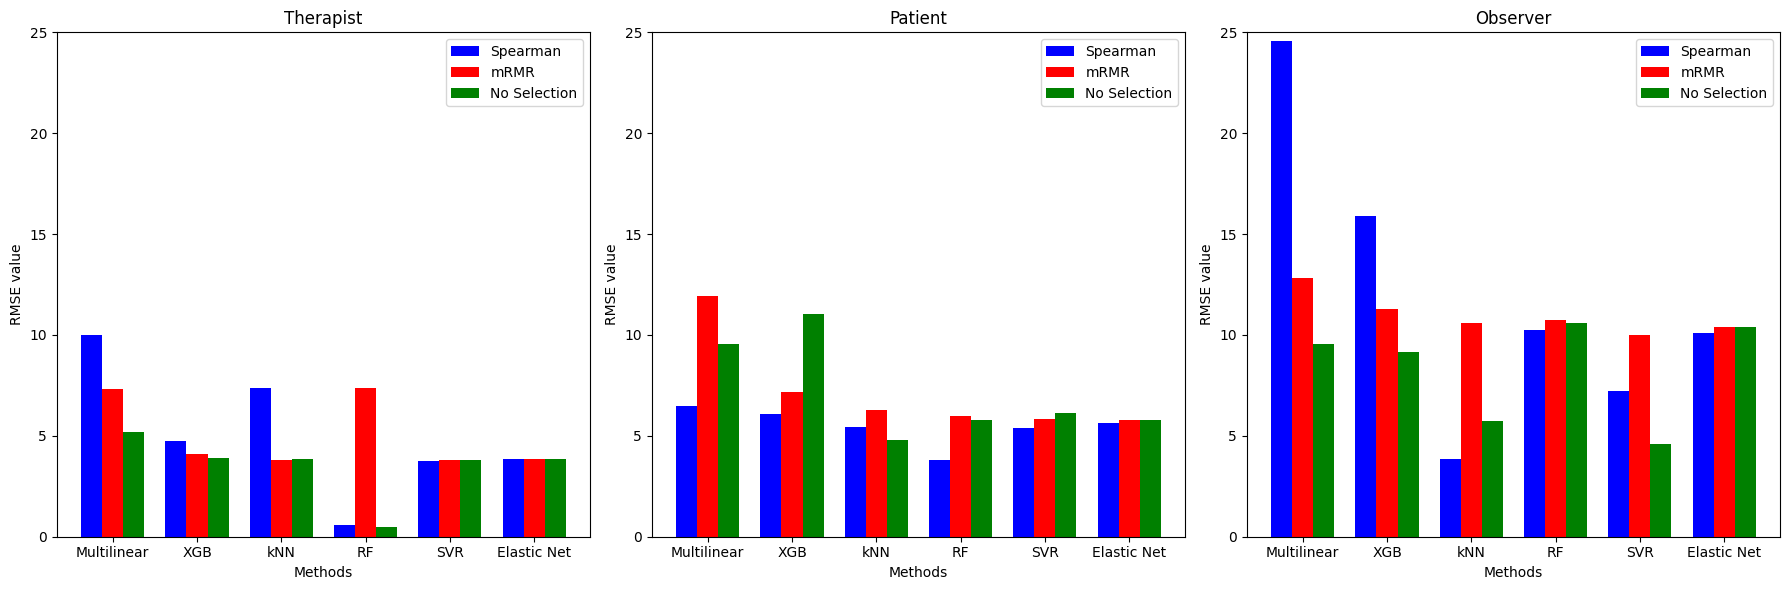

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for therapist feature selection
methods = ['Multilinear', 'XGB', 'kNN', 'RF', 'SVR', 'Elastic Net']
mrmr_rmse = [7.34, 4.08, 3.81, 7.348,3.805,3.865]
no_selection_rmse = [5.20, 3.91, 3.85, 0.48,3.801,3.865]
spearman_rmse = [10, 4.722, 7.3915, 0.57,3.7756,3.8650]

# Normalize data
def normalize_data(data):
    max_value = max(data)
    return data

mrmr_rmse_norm = normalize_data(mrmr_rmse)
no_selection_rmse_norm = normalize_data(no_selection_rmse)
spearman_rmse_norm = normalize_data(spearman_rmse)

bar_width = 0.25
index = np.arange(len(methods))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Set y-axis limits
y_limit = (0, 25)

# Plotting for therapist
axes[0].bar(index, spearman_rmse_norm, bar_width, color='blue', label='Spearman')
axes[0].bar(index + bar_width, mrmr_rmse_norm, bar_width, color='red', label='mRMR')
axes[0].bar(index + 2 * bar_width, no_selection_rmse_norm, bar_width, color='green', label='No Selection')
axes[0].set_xlabel('Methods')
axes[0].set_ylabel('RMSE value')
axes[0].set_title('Therapist')
axes[0].set_xticks(index + bar_width)
axes[0].set_xticklabels(methods)
axes[0].legend()
axes[0].set_ylim(y_limit)

# patient
spearman_rmse_patient = [6.50, 6.058, 5.44, 3.825,5.3942,5.63820]
mrmr_rmse_patient = [11.92, 7.16, 6.3, 6,5.824,5.782]
no_selection_rmse_patient = [9.576, 11.06, 4.79, 5.782,6.1567,5.795]

spearman_rmse_patient_norm = normalize_data(spearman_rmse_patient)
mrmr_rmse_patient_norm = normalize_data(mrmr_rmse_patient)
no_selection_rmse_patient_norm = normalize_data(no_selection_rmse_patient)

# Plotting for patient
axes[1].bar(index, spearman_rmse_patient_norm, bar_width, color='blue', label='Spearman')
axes[1].bar(index + bar_width, mrmr_rmse_patient_norm, bar_width, color='red', label='mRMR')
axes[1].bar(index + 2 * bar_width, no_selection_rmse_patient_norm, bar_width, color='green', label='No Selection')
axes[1].set_xlabel('Methods')
axes[1].set_ylabel('RMSE value')
axes[1].set_title('Patient')
axes[1].set_xticks(index + bar_width)
axes[1].set_xticklabels(methods)
axes[1].legend()
axes[1].set_ylim(y_limit)

# Data for observer feature selection
spearman_rmse_observer = [24.56, 15.88, 3.872, 10.25, 7.216, 10.075]
mrmr_rmse_observer = [12.84, 11.289, 10.6, 10.76, 10.0, 10.401]
no_selection_rmse_observer = [9.55, 9.15, 5.740, 10.57, 4.582, 10.401]

spearman_rmse_observer_norm = normalize_data(spearman_rmse_observer)
mrmr_rmse_observer_norm = normalize_data(mrmr_rmse_observer)
no_selection_rmse_observer_norm = normalize_data(no_selection_rmse_observer)

# Plotting for observer
axes[2].bar(index, spearman_rmse_observer_norm, bar_width, color='blue', label='Spearman')
axes[2].bar(index + bar_width, mrmr_rmse_observer_norm, bar_width, color='red', label='mRMR')
axes[2].bar(index + 2 * bar_width, no_selection_rmse_observer_norm, bar_width, color='green', label='No Selection')
axes[2].set_xlabel('Methods')
axes[2].set_ylabel('RMSE value')
axes[2].set_title('Observer')
axes[2].set_xticks(index + bar_width)
axes[2].set_xticklabels(methods)
axes[2].legend()
axes[2].set_ylim(y_limit)

# Adjust layout
plt.tight_layout()
plt.savefig("Comparison of Feature Selection Methods (RMSE).pdf", format='pdf')
plt.savefig("Comparison of Feature Selection Methods (RMSE).png", format='png')
plt.show()


# whisper plot

<Figure size 600x600 with 0 Axes>

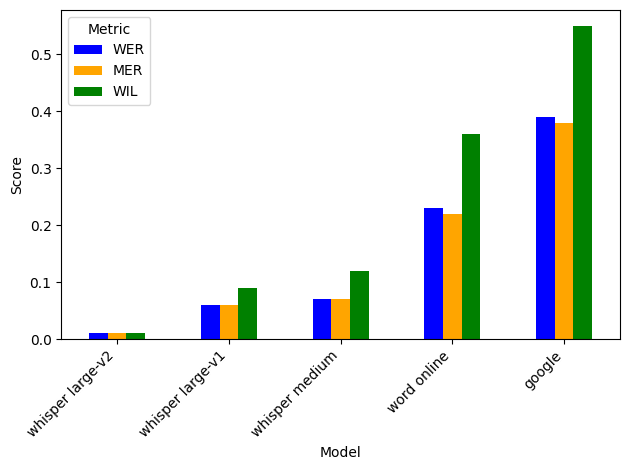

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the table
data = {
    'Model': ['whisper large-v2', 'whisper large-v1', 'whisper medium', 'word online', 'google'],
    'WER': [0.01, 0.06, 0.07, 0.23, 0.39],
    'MER': [0.01, 0.06, 0.07, 0.22, 0.38],
    'WIL': [0.01, 0.09, 0.12, 0.36, 0.55]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the Model column as the index for better visualization
df.set_index('Model', inplace=True)

# Plotting
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed

# Plotting bars for each model and each metric
df.plot(kind='bar', color=['blue', 'orange', 'green'])

plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Metric')

# Display the plot
plt.tight_layout()  # Adjust spacing
plt.savefig("Transcription_comparison.pdf", format='pdf')
plt.show()


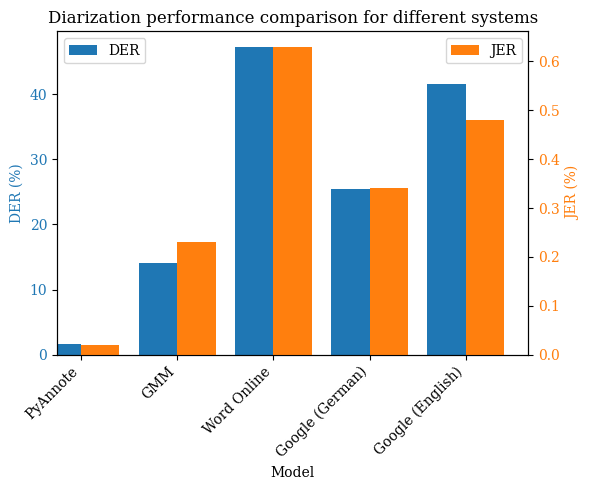

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager

# Set serif font
plt.rcParams["font.family"] = "serif"

# Data from the table
data = {
    'Model': ['PyAnnote', 'GMM', 'Word Online', 'Google (German)', 'Google (English)'],
    'DER (%)': [1.7, 14.1, 47.3, 25.4, 41.6],
    'JER (%)': [0.02, 0.23, 0.63, 0.34, 0.48]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the Model column as the index for better visualization
df.set_index('Model', inplace=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(6, 5))  # Adjust the figure size if needed

# Plotting DER on the left axis
color = 'tab:blue'
df['DER (%)'].plot(kind='bar', color=color, ax=ax1, position=1, width=0.4)
ax1.set_xlabel('Model')
ax1.set_ylabel('DER (%)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Plotting JER on the right axis
color = 'tab:orange'
df['JER (%)'].plot(kind='bar', color=color, ax=ax2, position=0, width=0.4)
ax2.set_ylabel('JER (%)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Setting x-axis labels and rotating for readability
ax1.set_xticklabels(df.index, rotation=45, ha='right')

# Adding legend
ax1.legend(['DER'], loc='upper left')
ax2.legend(['JER'], loc='upper right')

# Title and layout adjustments
plt.title('Diarization performance comparison for different systems')
plt.tight_layout()

# Display the plot
plt.show()
